# Wine Quality Classification Using Machine Learning

## Introduction

Wine quality assessment is often subjective and traditionally relies on human tasters. However, with the rise of data science and machine learning, it is now possible to build predictive models that can classify wine quality based on measurable physicochemical properties.

This project aims to predict wine quality classification using machine learning models trained on various physicochemical properties of red wine. I explore the dataset, evaluate feature relationships, train and compare different classification models, and tune the best model for improved accuracy.

## Part 1: Using Data Science to Understand What Makes Wine Taste Good

### Section 1: Data Exploration

#### In this section, I perform exploratory data analysis to understand the structure of the dataset and examine the distribution of wine quality scores. This helps uncover patterns, spot anomalies, and guide the feature selection process for modeling.


#### First, import some necessary libraries. 

In [217]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 

import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualization code visuals.py from project root folder
import visuals as vs

# Pretty display for notebooks
%matplotlib inline
print('setup complete')

setup complete


#### Libraries Used

- **NumPy**: Provides support for large, multi-dimensional arrays and numerical operations.
- **Pandas**: Used for data manipulation and analysis through dataframes.
- **Matplotlib & Seaborn**: Visualization libraries used to create plots, charts, and heatmaps.
- **IPython.display**: Allows for cleaner rendering of output, like formatted tables.
- **Time**: Used to measure training and prediction time during model evaluation.


#### Next, I'll load the dataset for red wines, and display the first 5 records to get an initial look at the structure of the data.

In [218]:
# Load the Red Wines dataset
data = pd.read_csv("data/winequality-red.csv", sep=';')
# Display the first five records
display(data.head(n=5))

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### Before diving into analysis, it's important to verify whether the dataset contains any missing values. This helps ensure data quality and prevents errors in subsequent processing steps.

In [219]:
# Find if the data has any null information
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

#### Get additional information about the features in the data-set and their data types:

In [220]:
# Get additional information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### The last column *quality* is a metric of how good a specific wine was rated to be. To gain insights into the quality of wines, I calculated how many wines are rated above or below 6 and their respective proportions. I also examined key statistics (mean, standard deviation, min, max, etc.) for all features using `.describe()` to get a sense of feature distributions.

In [224]:
# Total number of wines
n_wines = data.shape[0]

# Number of wines with quality rating above 6
quality_above_6 = data.loc[(data['quality'] >= 6)]
n_above_6 = quality_above_6.shape[0]

# Number of wines with quality rating below 6
quality_below_6 = data.loc[(data['quality'] < 6)]
n_below_6 = quality_below_6.shape[0]


# Percentage of wines with quality rating above 6 and below 6
greater_percent = (n_above_6 / n_wines) * 100
below_percent = (n_below_6 / n_wines) * 100

# Print the results

print("Total number of wine data: {}".format(n_wines))
print("Wines with rating 6 and above: {}".format(n_above_6))
print("Wines with rating less than 6: {}".format(n_below_6))
print("Percentage of wines with quality 6 and above: {:.2f}%".format(greater_percent))
print("Percentage of wines with quality below 6: {:.2f}%".format(below_percent))

display(np.round(data.describe(), 2))

Total number of wine data: 1599
Wines with rating 6 and above: 855
Wines with rating less than 6: 744
Percentage of wines with quality 6 and above: 53.47%
Percentage of wines with quality below 6: 46.53%


fixed acidity  volatile acidity  citric acid  residual sugar  \
count        1599.00           1599.00      1599.00         1599.00   
mean            8.32              0.53         0.27            2.54   
std             1.74              0.18         0.19            1.41   
min             4.60              0.12         0.00            0.90   
25%             7.10              0.39         0.09            1.90   
50%             7.90              0.52         0.26            2.20   
75%             9.20              0.64         0.42            2.60   
max            15.90              1.58         1.00           15.50   

       chlorides  free sulfur dioxide  total sulfur dioxide  density       pH  \
count    1599.00              1599.00               1599.00  1599.00  1599.00   
mean        0.09                15.87                 46.47     1.00     3.31   
std         0.05                10.46                 32.90     0.00     0.15   
min         0.01                 1.00                  6.00     0.99     2.74   
25%         0.07                 7.00                 22.00     1.00     3.21   
50%         0.08                14.00                 38.00     1.00     3.31   
75%         0.09                21.00                 62.00     1.00     3.40   
max         0.61                72.00                289.00     1.00     4.01   

       sulphates  alcohol  quality  
count    1599.00  1599.00  1599.00  
mean        0.66    10.42     5.64  
std         0.17     1.07     0.81  
min         0.33     8.40     3.00  
25%         0.55     9.50     5.00  
50%         0.62    10.20     6.00  
75%         0.73    11.10     6.00  
max         2.00    14.90     8.00

#### To better understand the range, central tendency, and skewness of each feature, I plotted histograms for all the numeric variables. This helps identify potential outliers, imbalances, or skewed distributions that might affect modeling later on.

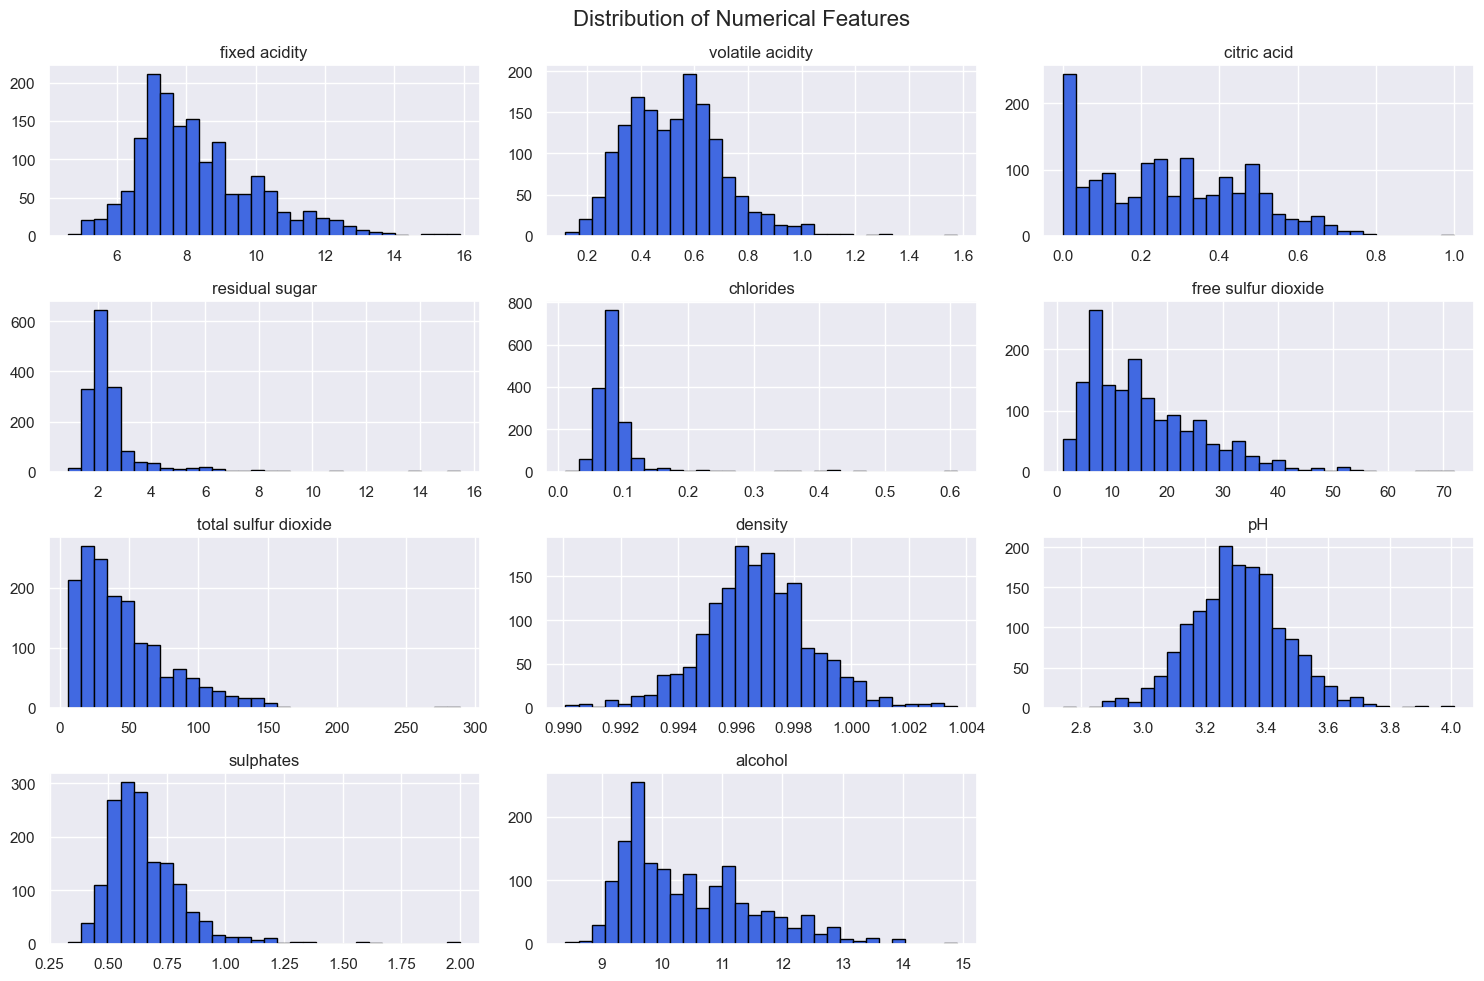

In [223]:
# Set style
sns.set(style="dark")

# Drop the target column so we only visualize features
features = data.drop('quality', axis=1)

# Plot
features.hist(bins=30, figsize=(15, 10), color='royalblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


#### Then I plotted the distribution of quality.

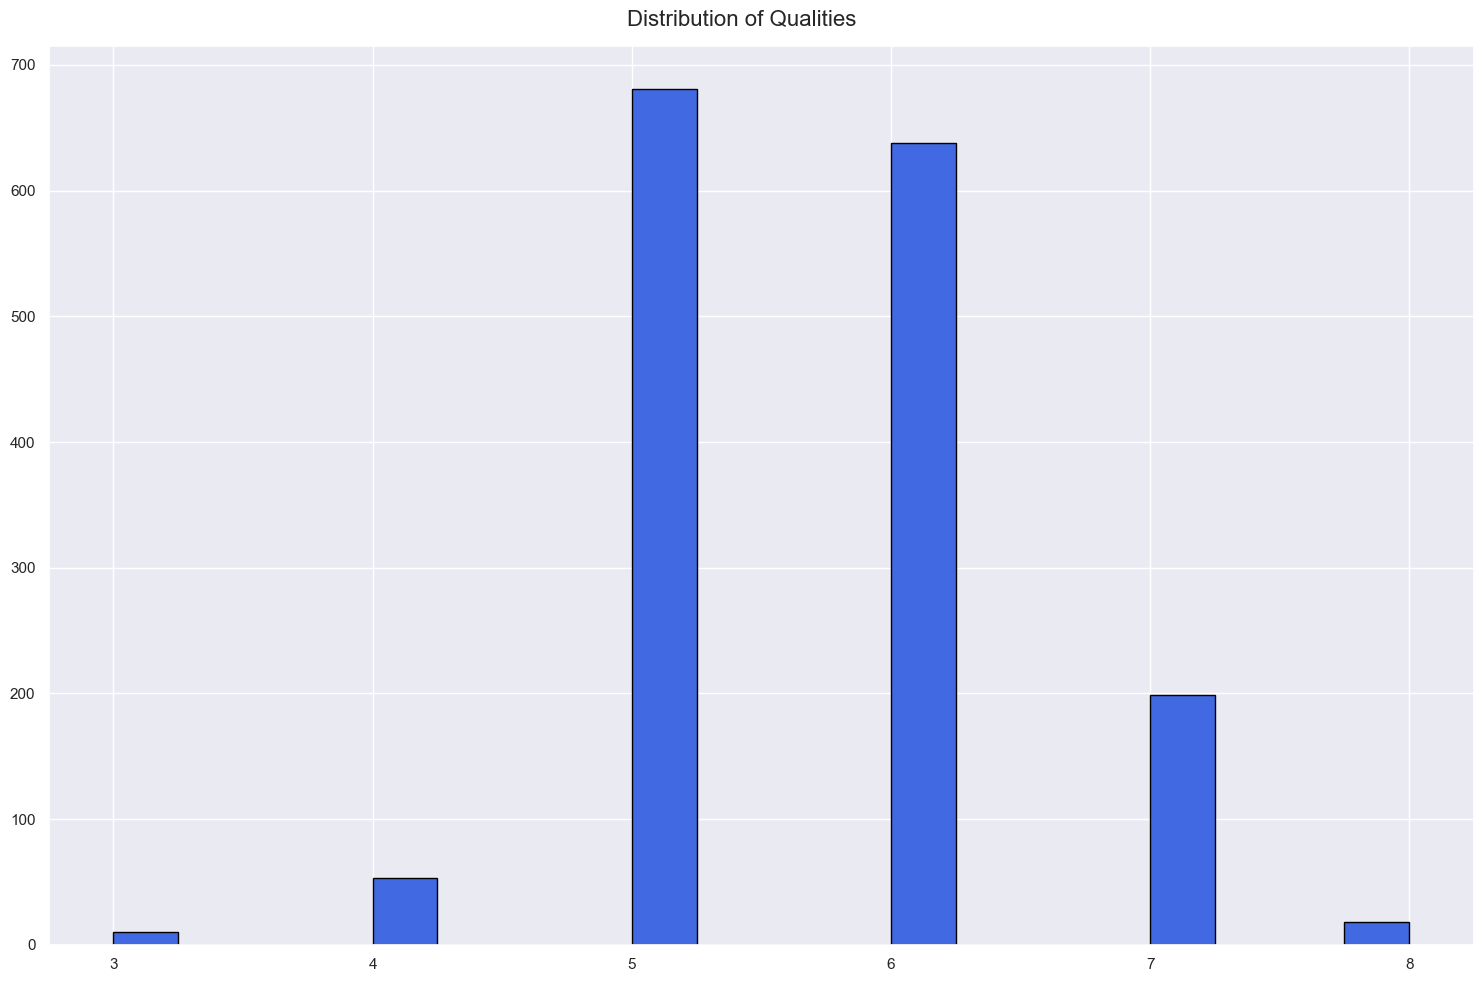

In [111]:
quality = data['quality']
quality.hist(bins=20, figsize=(15, 10), color='royalblue', edgecolor='black')
plt.suptitle('Distribution of Qualities', fontsize=16)
plt.tight_layout()
plt.show()


#### Then I calculated the skewness numerically and plotted top 3 most skewed features.

Skewness of features:
 chlorides               5.680347
residual sugar          4.540655
sulphates               2.428672
total sulfur dioxide    1.515531
free sulfur dioxide     1.250567
fixed acidity           0.982751
alcohol                 0.860829
volatile acidity        0.671593
citric acid             0.318337
pH                      0.193683
density                 0.071288
dtype: float64


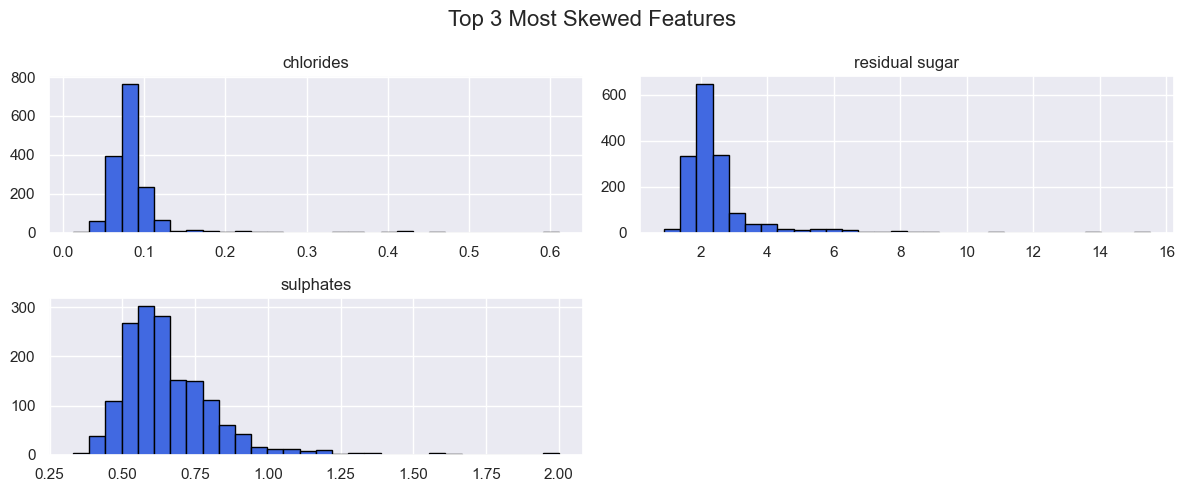

In [112]:
# Calculate skewness
skewness = features.skew().sort_values(ascending=False)
print("Skewness of features:\n", skewness)

# Plot top 3 most skewed features
top_skewed = skewness.head(3).index
features[top_skewed].hist(bins=30, figsize=(12, 5), color='royalblue', edgecolor='black')
plt.suptitle('Top 3 Most Skewed Features', fontsize=16)
plt.tight_layout()
plt.show()

### Section 2: Feature Relationship Analysis

#### In this section, I examine the relationships between the various physicochemical features in the dataset to better understand how they interact with each other, and how they may relate to wine quality. 

#### Visualize pairwise relationships between variables by the scatter plot matrix
To explore potential correlations and interactions between features, I created a scatter plot matrix. This matrix provides an overview of how each feature relates to every other feature

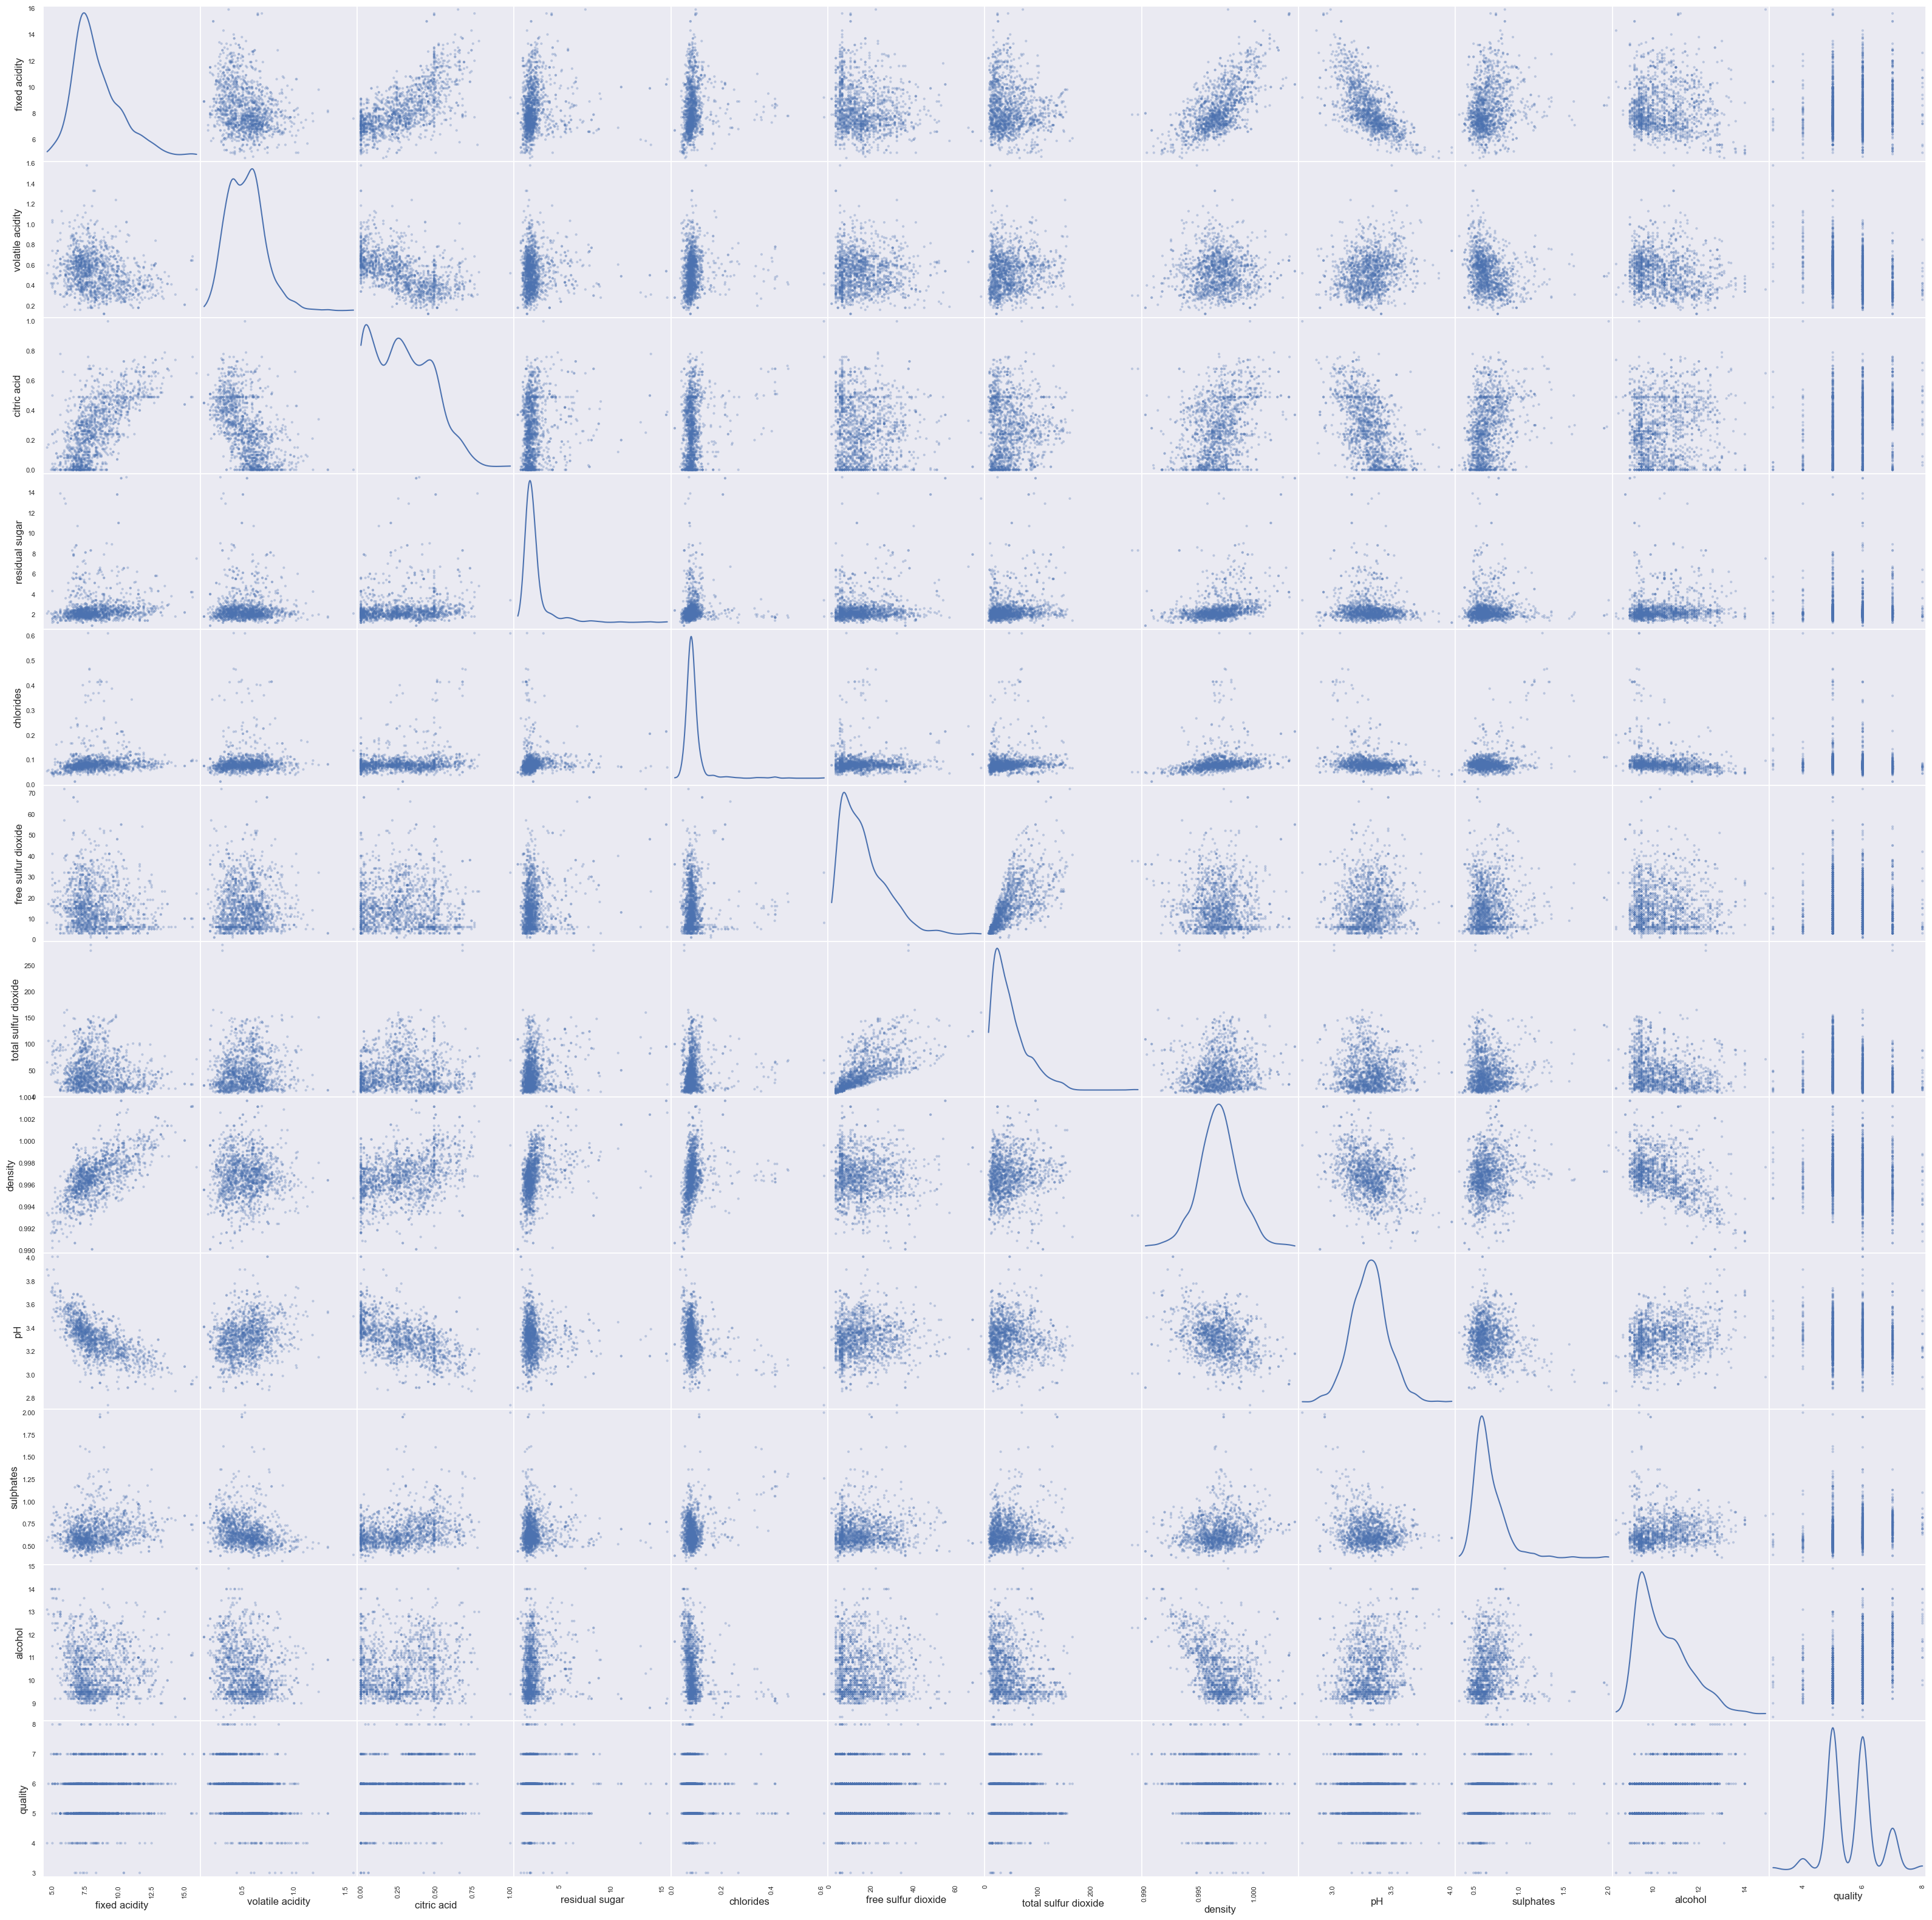

In [119]:
# Draw a scatter plot matrix of features
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (40,40), diagonal = 'kde')
plt.show()

#### To get the numerical value of correlation between features, I draw a heapmap. 
The dark red cells indicate a strong positive relationship, whereas the bright blue cells indicate a strong negative relationship.

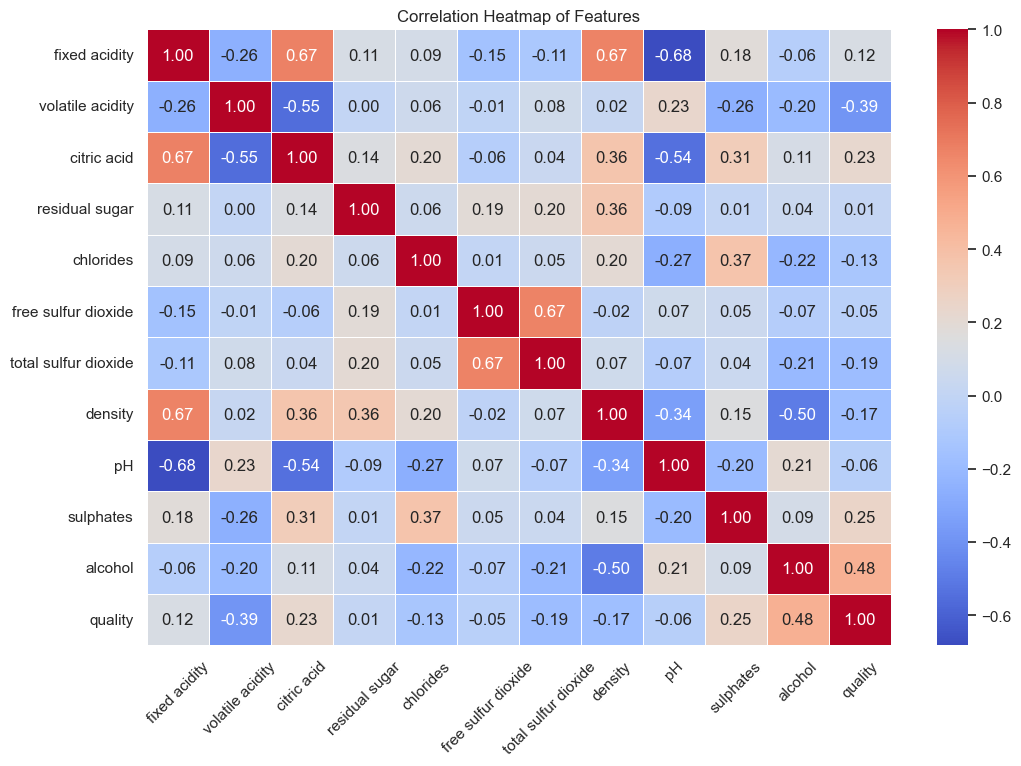

In [123]:
# Draw a heatmap between features
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.xticks(rotation=45) # ratate x-axis labels for readability
plt.show()


I use **|r| = 0.6** as a threshold to determine whether two features have a strong realtionship.

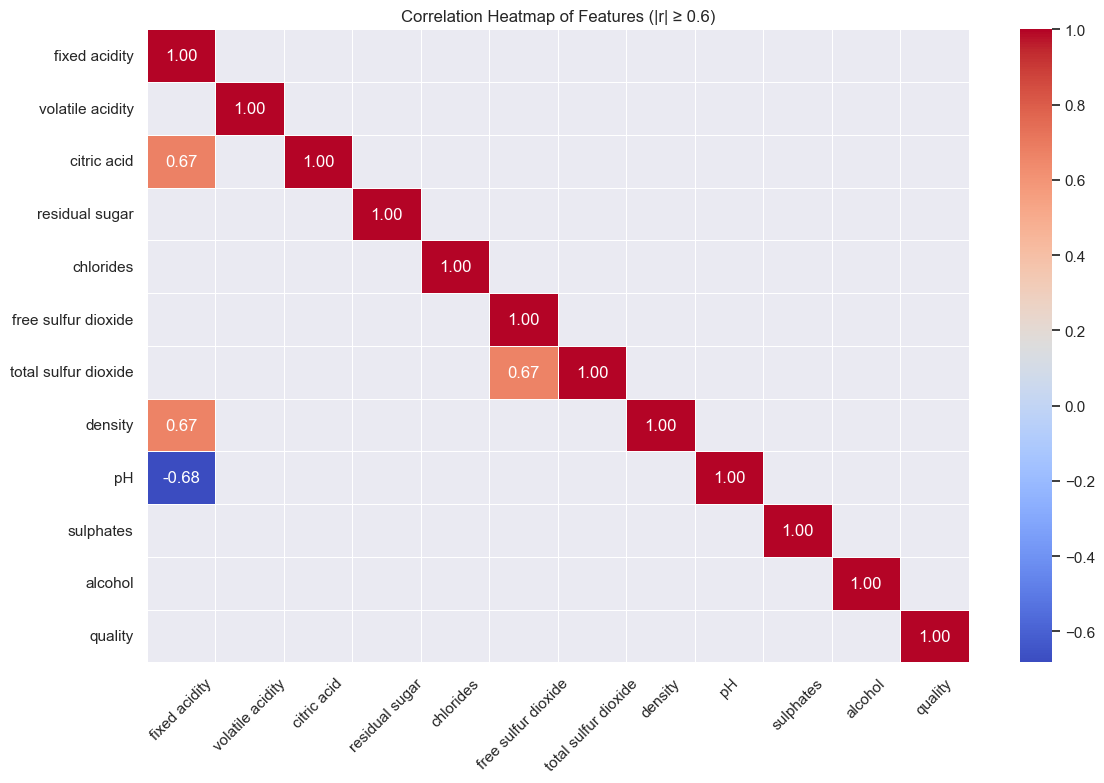

In [225]:
# Hide correlations where |r| < 0.6 or in the lower triangle
mask_low_corr = correlation.abs() < 0.6
mask_upper = np.triu(np.ones_like(corr, dtype=bool), k=1)
final_mask = mask_low_corr | mask_upper

# Plot masked heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=final_mask, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Features (|r| ≥ 0.6)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the heatmap above, we can observe that there are four feature pairs with a strong linear relationship (|correlation| ≥ 0.6):
    
**pH** and **fixed acidity**

**density** and **fixed acidity**

**citric acid** and **fixed acidity**

**free sulfur dioxide** and **total sulfur dioxide**

These strong correlations suggest potential multicollinearity, especially among features related to acidity and sulfur content. We should be careful when including these features into our model.

#### Then we analize the relationship between the feartures in all four feature pairs above.

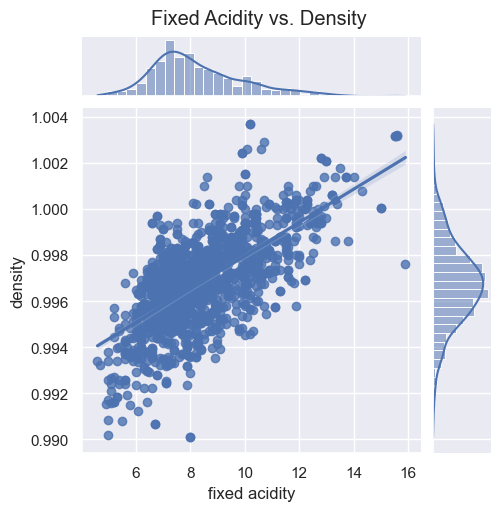

In [148]:
# Visualize density vs fixed acidity
sns.set(style="darkgrid")
sns.jointplot(data=data, x="fixed acidity", y="density", kind="reg", height=5)
plt.suptitle("Fixed Acidity vs. Density", y=1.02)
plt.show()

The scatter plot with regression line shows a relatively strong positive linear relationship between fixed acidity and density.
This relationship is align with the chemical fact, as higher acidity levels tend to have greater liquid density.
Since these features are correlated (r = 0.67), they may carry overlapping information.
When we fit the model, we may consider keeping only one of them if multicollinearity becomes an issue.

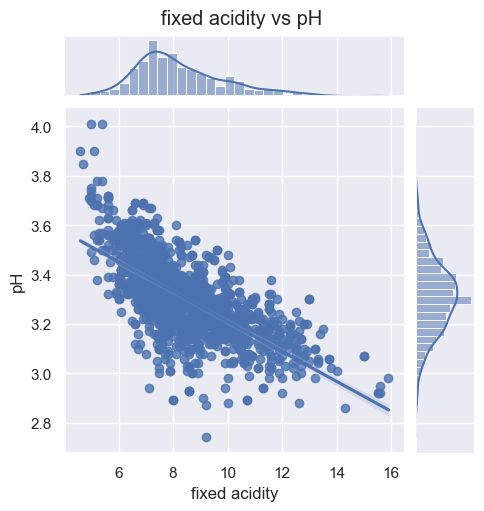

In [153]:
# Visualize fixed acidity vs pH
sns.jointplot(data=data, x="fixed acidity", y="pH", kind="reg", height=5)
plt.suptitle("fixed acidity vs pH", y=1.02)
plt.show()

The scatter plot with regression line shows a relatively strong negative relationship between ficed acidity and pH. This relationship is aligned with the chemical definition, as acidity levels increase, liquid pH decrease. Since these features are correlated (r = -0.68), they may carry overlapping information. When we fit the model, we may consider keeping only one of them if multicollinearity becomes an issue.

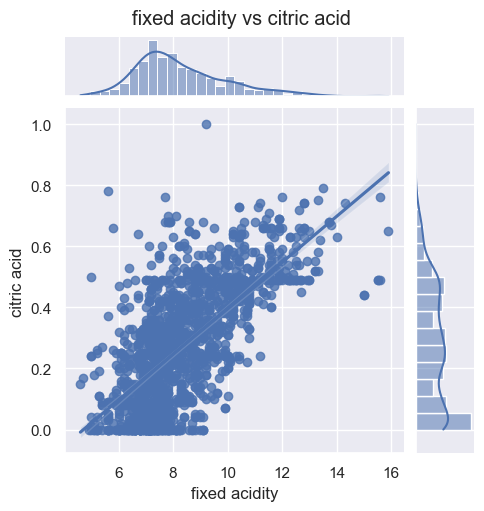

In [154]:
# Visualize fixed acidity vs citric acid
sns.jointplot(data=data, x="fixed acidity", y="citric acid", kind="reg", height=5)
plt.suptitle("fixed acidity vs citric acid", y=1.02)
plt.show()

The scatter plot with regression line shows a relatively strong positive relationship between fixed acidity and citric acid. This result is expected, as citric acid is one of the primary components that contribute to the acidity in wine. Since these features are correlated (r = 0.67), they may carry overlapping information. When we fit the model, we may consider keeping only one of them if multicollinearity becomes an issue.

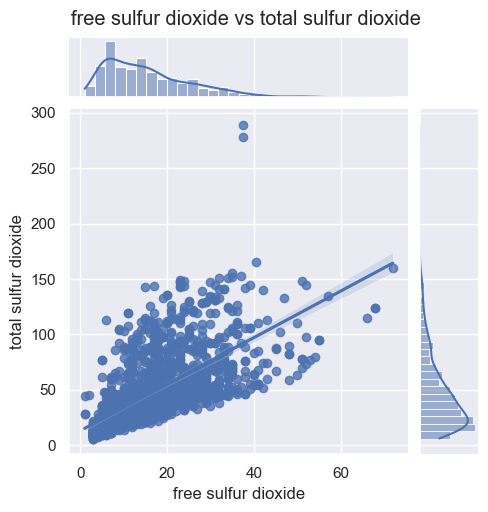

In [155]:
# Visualize free sulfur dioxide and total sulfur dioxide
sns.jointplot(data=data, x="free sulfur dioxide", y="total sulfur dioxide", kind="reg", height=5)
plt.suptitle("free sulfur dioxide vs total sulfur dioxide", y=1.02)
plt.show()

The scatter plot with regression line shows a strong positive relationship between free sulfur dioxide and total sulfur dioxide. This is expected because free sulfur dioxide is included in total sulfur dioxide. Since these features are correlated (r = 0.67), they may carry overlapping information. When we fit the model, we may consider keeping only one of them, or creating a new feature like the ratio: free sulfur dioxide / total sulfur dioxide.

After examining the correlation matrix, I focused on feature pairs with a correlation coefficient |r| ≥ 0.6. Below is a summary of the most significant relationships and their implications:

| **Feature Pair**                   | **Correlation** | **Relationship**            | **Interpretation & Modeling Notes** |
|-----------------------------------|------------------|---------------------|--------------------------------------|
| Fixed Acidity ~ pH                | ≈ -0.68          | Strong Negative     | As acidity increases, pH drops. Redundant info. May keep only one in linear models. |
| Fixed Acidity ~ Density           | ≈ +0.67          | Strong Positive     | Denser wines tend to have higher acidity. Potential multicollinearity. |
| Fixed Acidity ~ Citric Acid       | ≈ +0.67          | Strong Positive     | Citric acid is part of fixed acidity. Consider combining or selecting one. |
| Free Sulfur Dioxide ~ Total SO₂   | ≈ +0.67          | Strong Positive     | Total SO₂ includes free SO₂. May use ratio or select only one. |

#### Then we will visualize the impact of volatile acidity and alcohol on the quality of a wine, since these two features demonstrate relatively strong correlation with the quality of a wine.

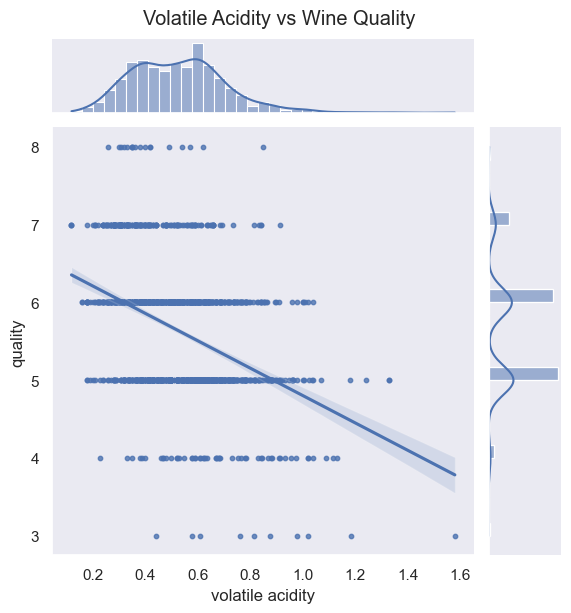

In [226]:
# Visualize quality vs volatile acidity
g = sns.JointGrid(x="volatile acidity", y="quality", data=data, height=6)
g.plot_joint(sns.regplot, scatter_kws={"s": 10})
g.plot_marginals(sns.histplot, kde=True)
plt.suptitle("Volatile Acidity vs Wine Quality", y=1.02)
plt.show()

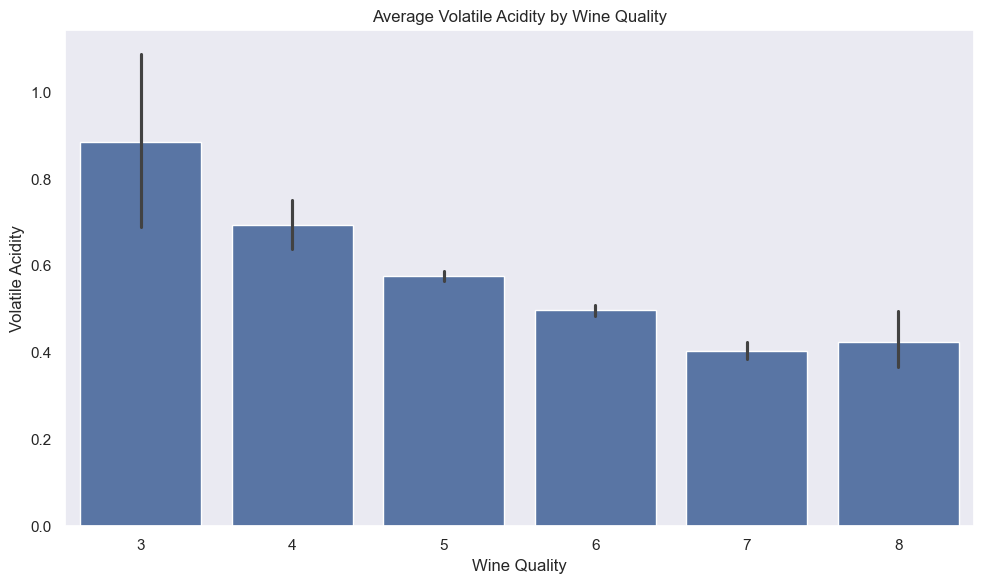

In [237]:
# I can visualize relationships of discreet values (quality vs volatile acidity) better with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='volatile acidity', data=data, errorbar=('ci', 95))
plt.title('Average Volatile Acidity by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Volatile Acidity')
plt.tight_layout()
plt.show()

The bar plot illustrates the relationship between wine quality and average volatile acidity, with 95% confidence intervals shown as vertical lines.

We can see a clear downward trend: wines with higher quality ratings (6–8) tend to have lower average volatile acidity, while lower-rated wines (3–5) have significantly higher acidity levels.
The confidence intervals, shown by the black vertical lines, for lower quality wines do not overlap with those of higher quality wines, indicating that the difference is statistically significant.

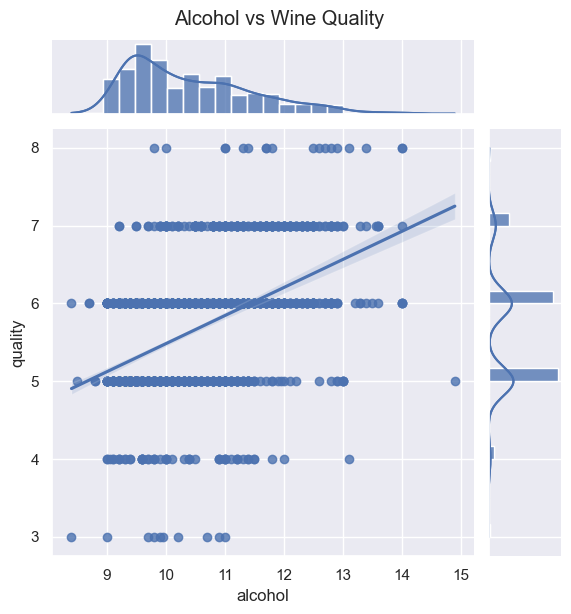

In [173]:
#Visualize Alchhol vs wine quality
g = sns.jointplot(data=data, x="alcohol", y="quality", kind="reg", height=6)
g.plot_marginals(sns.histplot, kde=True)
plt.suptitle("Alcohol vs Wine Quality", y=1.02)
plt.show()


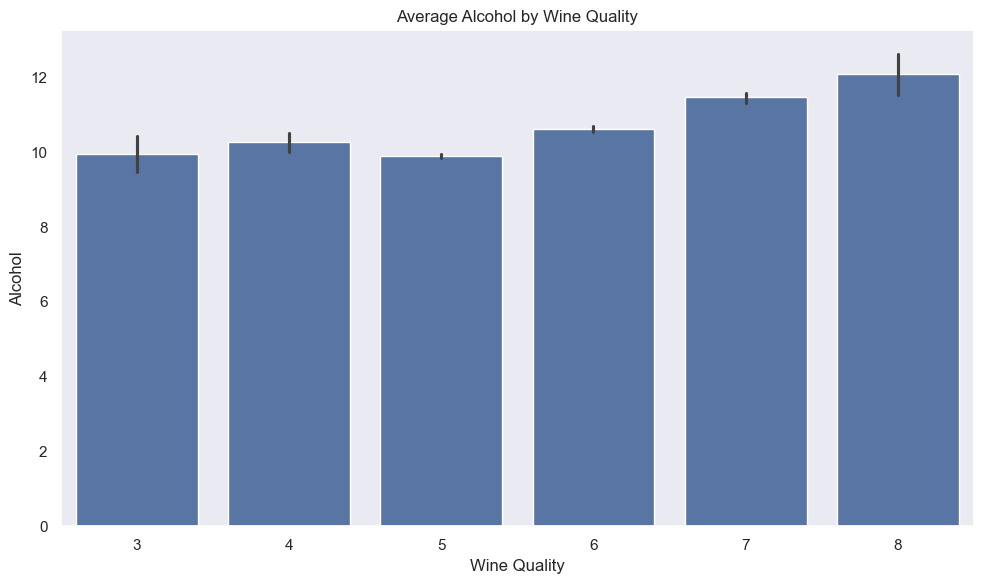

In [236]:
# I can visualize relationships of discreet values (quality vs alcohol) better with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='alcohol', data=data, errorbar=('ci', 95))
plt.title('Average Alcohol by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.tight_layout()
plt.show()


The bar plot illustrates the relationship between wine quality and alcohol content, with 95% confidence intervals shown as vertical lines.

A clear upward trend is observed: wines with higher quality ratings (7–8) tend to have higher average alcohol content, while lower and average quality wines (3–6) show relatively lower and similar levels of alcohol. Notably, the confidence intervals for high-quality wines do not overlap with those of the lower-quality groups, indicating that the difference is statistically significant.
This supports the idea that alcohol is a strong positive predictor of wine quality and should be considered a key feature for modeling.

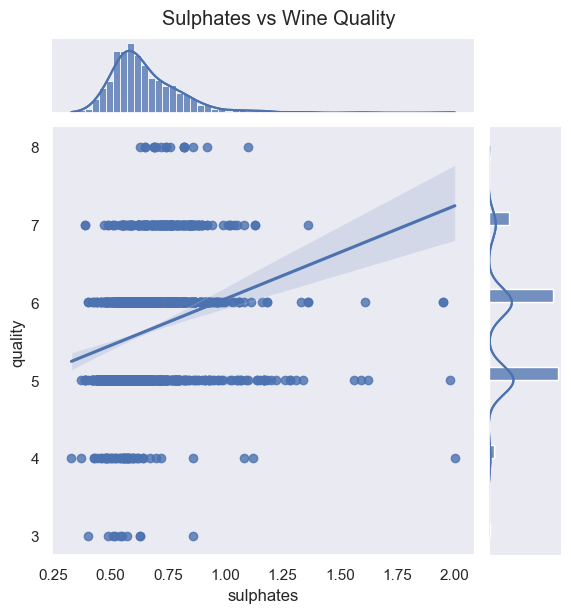

In [229]:
# Visualize sulphates vs quality
g = sns.jointplot(data=data, x="sulphates", y="quality", kind="reg", height=6)
g.plot_marginals(sns.histplot, kde=True)
plt.suptitle("Sulphates vs Wine Quality", y=1.02)
plt.show()

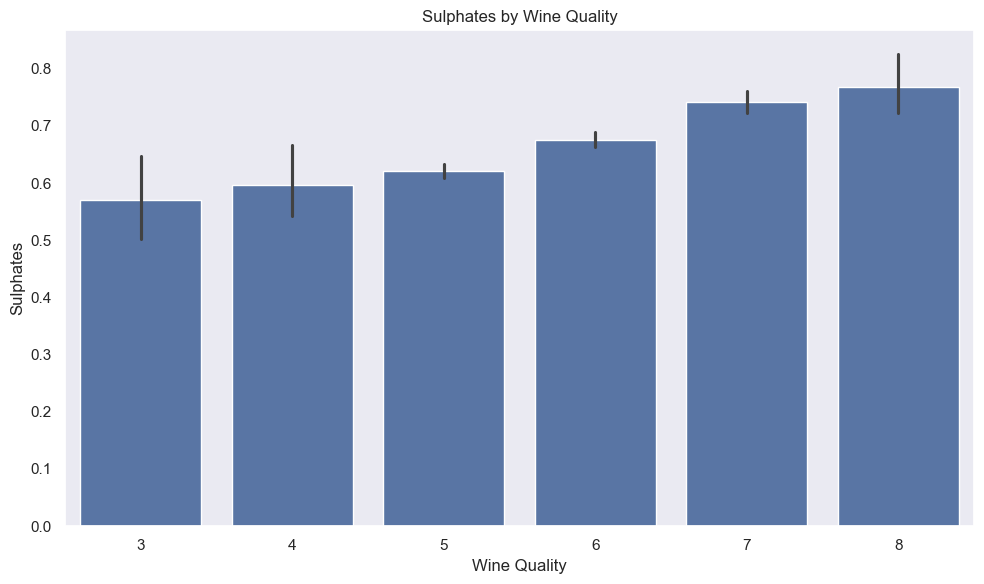

In [235]:
# I can visualize relationships of discreet values (quality vs sulphates) better with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='quality', y='sulphates', data=data, errorbar=('ci', 95))
plt.title('Sulphates by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates')
plt.tight_layout()
plt.show()

The bar plot illustrates the relationship between wine quality and sulphates content, with 95% confidence intervals shown as vertical lines.

A clear upward trend is observed: wines with higher quality ratings (6–8) tend to have higher average sulphates content, while lower and average quality wines (3–5) show relatively lower and similar levels of alcohol. Notably, the confidence intervals for high-quality wines do not overlap with those of the lower-quality groups, suggesting a statistically significant difference. This supports the idea that sulphates should be included as a predictor of wine quality when modeling.

#### Based on the correlation matrix and visual analysis, I focused on features with a correlation |r| ≥ 0.25 with wine quality, including alcohol, volatile acidity, and sulphates. These features showed meaningful trends and statistical significance across quality levels. Features with weaker correlations were not explored further, as they are less likely to contribute predictive value or model interpretability.

### Section 3: Outlier Detection

#### Outliers are extreme values that differ significantly from other observations in the dataset. These values can skew summary statistics, distort relationships between features, and reduce the performance of machine learning models.


In this section, I apply **Tukey’s Method** to identify outliers across all numeric features. Tukey's approach defines an outlier as any data point that lies beyond 1.5 times the interquartile range (IQR) below the 1st quartile or above the 3rd quartile.

For each feature, I:

- Calculated Q1 and Q3

- Computed the IQR as Q3 - Q1

- Defined an outlier step as 1.5 * IQR

- Flagged any data points lying outside the [Q1 - step, Q3 + step] range

Additionally, I identified data points that appear as outliers in multiple features, which may indicate stronger anomalies.

In [231]:
# Select numeric features
numeric_features = data.drop('quality', axis=1).columns

# Dictionary to store outliers for each feature
outliers_dict = {}

# Loop through each feature and apply Tukey's method
for feature in numeric_features:
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
    step = 1.5 * IQR

    # Find indices of outliers
    outliers = data[(data[feature] < Q1 - step) | (data[feature] > Q3 + step)].index
    outliers_dict[feature] = outliers.tolist()

    print(f"{feature}: {len(outliers)} outliers")

# Combine all outlier indices into one list (optional)
all_outliers = sum(outliers_dict.values(), [])
# Count how many times each index appears
from collections import Counter
outlier_counts = Counter(all_outliers)

# Print indices that appear as outliers in multiple features (optional)
multi_feature_outliers = [idx for idx, count in outlier_counts.items() if count > 1]
print(f"\nOutliers appearing in multiple features: {multi_feature_outliers}")


fixed acidity: 49 outliers
volatile acidity: 19 outliers
citric acid: 1 outliers
residual sugar: 155 outliers
chlorides: 112 outliers
free sulfur dioxide: 30 outliers
total sulfur dioxide: 55 outliers
density: 45 outliers
pH: 35 outliers
sulphates: 59 outliers
alcohol: 13 outliers

Outliers appearing in multiple features: [294, 338, 339, 353, 364, 366, 374, 381, 391, 409, 440, 442, 510, 516, 538, 544, 554, 555, 557, 559, 564, 652, 38, 94, 120, 553, 672, 690, 705, 1299, 151, 14, 15, 57, 154, 155, 156, 157, 192, 324, 325, 375, 396, 400, 408, 415, 480, 515, 608, 624, 625, 649, 889, 910, 1079, 1081, 1114, 1244, 1288, 1289, 1295, 1296, 1358, 1423, 1434, 1435, 1474, 1476, 1558, 17, 19, 81, 83, 106, 109, 169, 181, 226, 240, 258, 281, 451, 482, 483, 614, 689, 692, 695, 754, 795, 836, 837, 1051, 1165, 1260, 1319, 1370, 1371, 1372, 522, 1131, 86, 88, 91, 92, 201, 354, 591, 723, 142, 144, 588, 821, 1017, 1018, 1228, 1269, 1270, 1475, 1477]


#### After identifying the indices that appear as outliers in multiple features, I removed those rows from the dataset. These points are more likely to represent genuine anomalies that could negatively impact model training.

In [178]:
# Remove rows where index appears in multiple features as outliers
good_data = data.drop(index=multi_feature_outliers).reset_index(drop=True)

print(f"\nOriginal dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {good_data.shape}")



Original dataset shape: (1599, 12)
Cleaned dataset shape: (1479, 12)


To identify outliers, I used Tukey’s method on all input features (excluding the target **quality**). Outliers were defined as values falling outside 1.5 times the interquartile range (IQR).  
Rather than removing all detected outliers, I dropped those appeared in two or more features, as they are more likely to be true outliers. This approach prevents over-cleaning and preserves informative variability in the data.


## Part 2: Using Machine Learning to Predict the Quality of Wines

### Section 1: Data Preparation

#### First, we'll apply some transforms to convert our regression problem into a classification problem. 
- Wines with a quality score ≥ 7 are labeled as good quality (1).

- Wines with a quality score < 7 are labeled as not good quality (0).

In [233]:
# Binary classification target

model_data = good_data.copy()
model_data['good_quality'] = model_data['quality'].apply(lambda x: 1 if x >= 7 else 0)
# Define features and target
X = model_data.drop(['quality', 'good_quality'], axis=1)
y = model_data['good_quality']

X.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

#### Next, shuffle and split our data-set into training and testing subsets:
- 80% of the data is used for training the model.

- 20% is reserved for testing the model’s performance on unseen data.

In [184]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)  

# Show the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 1183 samples.
Testing set has 296 samples.


### Section 2: Model Training and Evaluation Setup

To streamline the process of training and evaluating different machine learning models, I define a reusable function `train_predict_evaluate()`, which
- Trains a given model on a subset of the training data.

- Evaluates its performance on both training and testing sets.

- Calculates key metrics:

  - Accuracy on training and test sets

  - F-Score (with β = 0.5)

- Tracks time taken for training and prediction to assess efficiency.

In [186]:
from sklearn.metrics import fbeta_score, accuracy_score
import time

def train_predict_evaluate(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    Trains a model on a sample of the data, evaluates it on training and testing subsets.
    
    Parameters:
        learner: scikit-learn classifier (e.g., LogisticRegression, RandomForestClassifier)
        sample_size: number of training samples to use
        X_train, y_train: training features and labels
        X_test, y_test: test features and labels

    Returns:
        Dictionary of timing and evaluation metrics
    '''

    results = {}

    # Train the model on a sample of the data
    start = time.time()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time()
    results['train_time'] = end - start

    # Predict on test set and 300 training samples
    start = time.time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time.time()
    results['pred_time'] = end - start

    # Accuracy scores
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # F-beta scores (beta=0.5 to emphasize precision slightly more)
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)

    # Log success
    print(f"{learner.__class__.__name__} trained on {sample_size} samples.")

    return results


### Section 3: Initial Model Comparison

To evaluate which supervised learning model performs best at predicting wine quality, I tested three different classifiers:

**Gaussian Naive Bayes (GaussianNB)**

**Decision Tree Classifier**

**Random Forest Classifier**

In [194]:
# Import three supervised learning classification models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Step 1: Initialize classifiers
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=42)
clf_C = RandomForestClassifier(random_state=42)

# Step 2: Training sample sizes
samples_100 = len(y_train)
samples_10 = int(0.10 * samples_100)
samples_1  = int(0.01 * samples_100)

# Step 3: Train and evaluate each model
results = {}
for clf in [clf_A, clf_B, clf_C]:
    name = clf.__class__.__name__
    results[name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[name][i] = train_predict_evaluate(clf, samples, X_train, y_train, X_test, y_test)

#print(results)

GaussianNB trained on 11 samples.
GaussianNB trained on 118 samples.
GaussianNB trained on 1183 samples.
DecisionTreeClassifier trained on 11 samples.
DecisionTreeClassifier trained on 118 samples.
DecisionTreeClassifier trained on 1183 samples.
RandomForestClassifier trained on 11 samples.
RandomForestClassifier trained on 118 samples.
RandomForestClassifier trained on 1183 samples.


Each model was trained using three different training set sizes (1%, 10%, and 100%).

For each configuration, I recorded:

- Training time

- Prediction time

- Accuracy on training and test sets

- F-score on training and test sets

#### To evalute three models numerically, I created a table showing the accuracy, F1 score and running time of all three models.

In [189]:
# Convert nested dict into flat list of rows
flat_results = []

for model_name, model_results in results.items():
    for size_key, metrics in model_results.items():
        row = {
            'Model': model_name,
            'Training Size %': [1, 10, 100][size_key],  # Map 0/1/2 to %s
            'Accuracy (Train)': metrics['acc_train'],
            'Accuracy (Test)': metrics['acc_test'],
            'F1 Score (Train)': metrics['f_train'],
            'F1 Score (Test)': metrics['f_test'],
            'Train Time (s)': metrics['train_time'],
            'Pred Time (s)': metrics['pred_time'],
        }
        flat_results.append(row)

# Create a DataFrame
results_df = pd.DataFrame(flat_results)

# Display the table
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.precision', 4)  # Format floats nicely

display(results_df.sort_values(by=['Model', 'Training Size %']))


Model  Training Size %  Accuracy (Train)  Accuracy (Test)  \
3  DecisionTreeClassifier                1            0.5300           0.5101   
4  DecisionTreeClassifier               10            0.8333           0.7500   
5  DecisionTreeClassifier              100            1.0000           0.8750   
0              GaussianNB                1            0.8400           0.8547   
1              GaussianNB               10            0.8167           0.8412   
2              GaussianNB              100            0.8067           0.8446   
6  RandomForestClassifier                1            0.7267           0.7331   
7  RandomForestClassifier               10            0.9200           0.8851   
8  RandomForestClassifier              100            1.0000           0.9189   

   F1 Score (Train)  F1 Score (Test)  Train Time (s)  Pred Time (s)  
3            0.1233           0.0500          0.0062         0.0007  
4            0.5049           0.2431          0.0006         0.0004  
5            1.0000           0.5319          0.0035         0.0004  
0            0.2747           0.0833          0.0779         0.0027  
1            0.4576           0.4754          0.0008         0.0004  
2            0.4296           0.4861          0.0012         0.0004  
6            0.1277           0.0682          0.0349         0.0030  
7            0.7821           0.5288          0.0346         0.0033  
8            1.0000           0.7143          0.0875         0.0046

#### To better compare three models by visualization, I evaluate accuracy and F1 score comparison by bar plots.

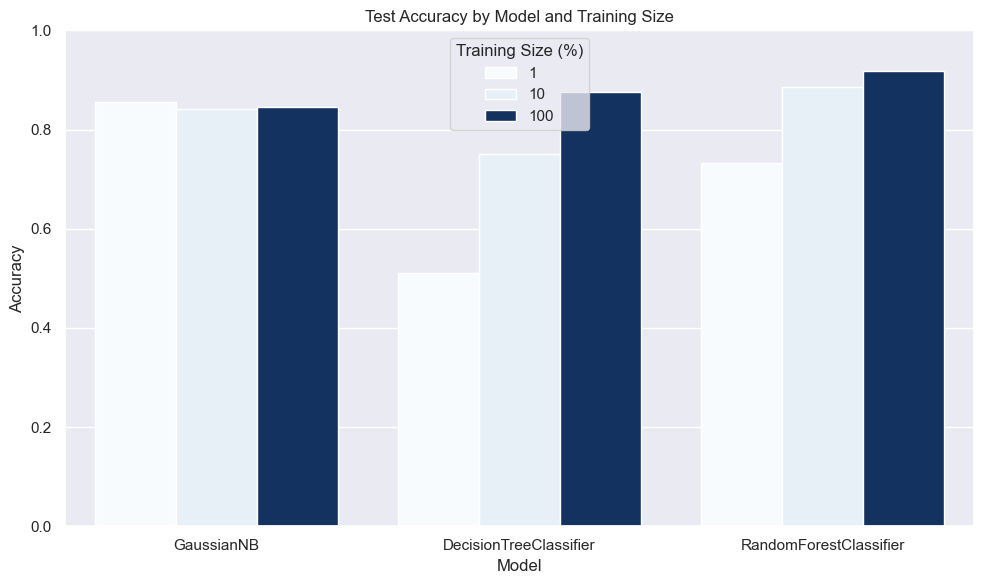

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x='Model',
    y='Accuracy (Test)',
    hue='Training Size %',
    palette='Blues'
)
plt.title('Test Accuracy by Model and Training Size')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend(title='Training Size (%)')
plt.tight_layout()
plt.show()


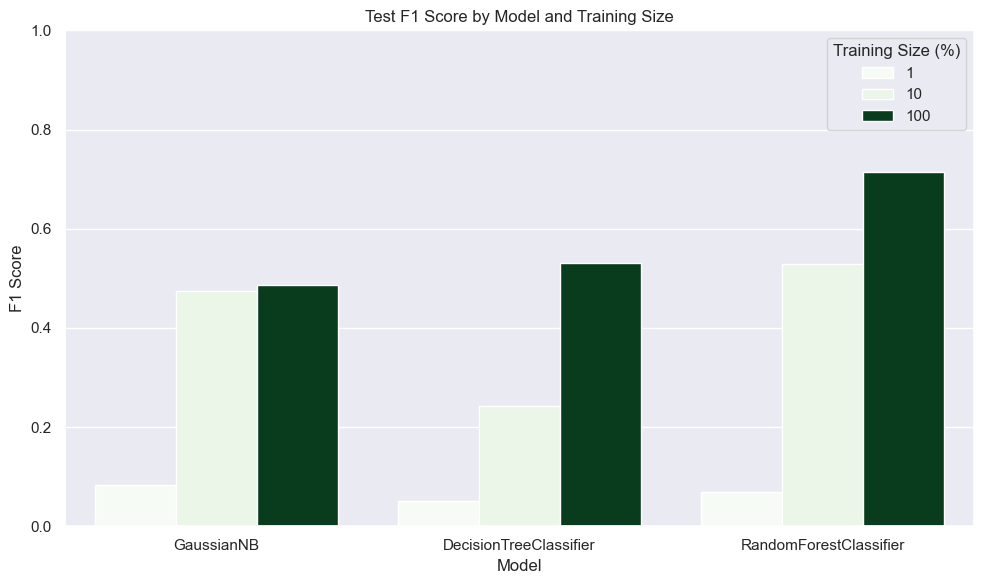

In [192]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=results_df,
    x='Model',
    y='F1 Score (Test)',
    hue='Training Size %',
    palette='Greens'
)
plt.title('Test F1 Score by Model and Training Size')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.legend(title='Training Size (%)')
plt.tight_layout()
plt.show()


Summary: To evaluate which supervised learning model performs best on our wine quality classification task, we tested three models across varying training sizes (1%, 10%, 100%): **DecisionTreeClassifier**, **Gaussian Naive Bayes (GaussianNB)** and **RandomForestClassifier**

We evaluated each model using: Accuracy on both **training and test sets**, **F1 Score (with β = 0.5)** to account for precision and recall balance, and **Training and prediction time**.

Based on the observation, Decision Tree achieved perfect training accuracy (1.00) but significantly lower test F1 score, indicating strong overfitting.
GaussianNB showed consistent and balanced performance across training sizes. While not the top performer, it demonstrated good generalization and stability.
Random Forest delivered the highest test accuracy (0.919) and F1 score (0.714) with 100% training data, outperforming the others. Despite high training accuracy (1.00), its generalization on test data remained strong.


Therefore, I selected **RandomForestClassifier** as the final model for further tuning and prediction.

Additionally, I noticed that Gaussian Naive Bayes (GaussianNB) performs poorly among all three models. This is becasue Gaussian Naive Bayes assumes each feature follows a Gaussian (bell-curve) distribution within each class, which is not true for some features in this wine quality dataset. Besides, it also assumes that features are independent given the class label, which is also not true. For example, density and fixed acidity are two highly correlated features, as shown in previous analysis.


### Section 4: Hyperparameter Tuning with GridSearchCV

#### To improve the performance of our chosen model RandomForestClassifier, I perform hyperparameter tuning using GridSearchCV.

I define a grid of possible values for key hyperparameters:

- `n_estimators`: Number of trees in the forest

- `max_depth`: Maximum depth of each tree

- `min_samples_split`: Minimum number of samples required to split an internal node

- `min_samples_leaf`: Minimum number of samples required at a leaf node

- `bootstrap`: Whether bootstrap samples are used when building trees

I perform 5-fold cross-validation to evaluate each parameter combination.

The model is scored using the F1-score, which balances precision and recall.

Finally, the best combination of parameters is selected based on cross-validated performance.

In [205]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# Define parameters
parameters = {
    'n_estimators': [100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Max depth of each tree
    'min_samples_split': [2, 5],       # Min samples to split a node
    'min_samples_leaf': [1, 2],        # Min samples required at each leaf
    'bootstrap': [True, False]         # Whether bootstrap samples are used
}

# Initialize base model
rf_model = RandomForestClassifier(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=parameters,
    cv=5,                       # 5-fold cross-validation
    scoring='f1',           # Use F1-score
)

grid_fit = grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best F1 score (CV):", grid_search.best_score_)


Best parameters found: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 score (CV): 0.5467402947945553


From the results above, I found that the best configuration was:

- `n_estimators`: 200  
- `max_depth`: 10  
- `min_samples_split`: 5  
- `min_samples_leaf`: 1  
- `bootstrap`: False

This combination yielded the best cross-validated F1 score of **0.5467**, indicating an improvement in balanced classification performance. We will now evaluate this tuned model on the test set.


In [202]:
# Make predictions using the best estimators
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[247   9]
 [ 16  24]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       256
           1       0.73      0.60      0.66        40

    accuracy                           0.92       296
   macro avg       0.83      0.78      0.80       296
weighted avg       0.91      0.92      0.91       296



#### Final Evaluation on Test Data

After applying GridSearchCV to fine-tune the Random Forest model, I evaluated the optimized model on the test set.

**Confusion Matrix**:
|                          | Predicted: Average (0) | Predicted: Good (1) |
|--------------------------|------------------------|---------------------|
| **Actual: Average (0)**  |           247          |          9          |
| **Actual: Good (1)**     |           16           |         24          |



**Classification Performance**:

- **Overall Accuracy**: 92%
- **Precision (Class 1 - Good Wines)**: 0.73  
- **Recall (Class 1 - Good Wines)**: 0.60  
- **F1-score (Class 1 - Good Wines)**: 0.66  

These results indicate that the model performs very well on identifying average-quality wines (Class 0), with high precision and recall. However, performance for detecting good-quality wines (Class 1) is more modest, suggesting room for improvement since only 60% of actual good wines were correctly identified.

Despite that, the tuned Random Forest model provides a strong balance between precision and recall, making it a reliable final model for predicting wine quality.



### Section 5: Feature Importance Analysis

In this section, to better understand which variables contribute most to predicting wine quality, I analyzed **feature importance** using our final tuned `RandomForestClassifier`. This approach measures how much each feature improves the model’s performance across the trees in the ensemble.

Top 5 most important features:
              Feature  Importance
10           alcohol      0.1914
9          sulphates      0.1301
1   volatile acidity      0.1176
2        citric acid      0.0915
7            density      0.0870


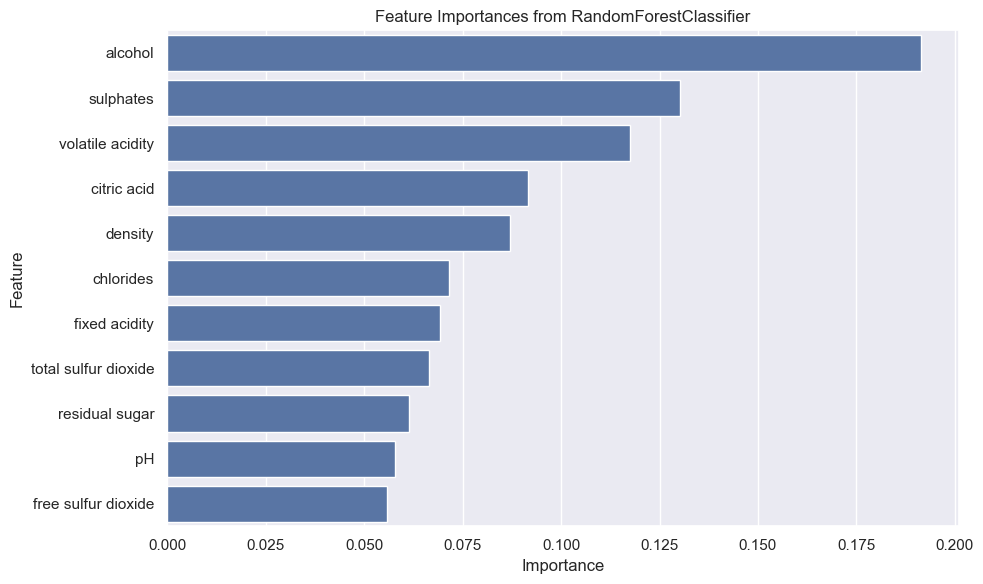

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for easy sorting and plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 5 features 
print("Top 5 most important features:\n", feature_importance_df.head())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from RandomForestClassifier')
plt.tight_layout()
plt.show()


Below are the **top 5** most important features:

| Rank | Feature             | Importance |
|------|---------------------|------------|
| 1    | **alcohol**         | 0.1914     |
| 2    | **sulphates**       | 0.1301     |
| 3    | **volatile acidity**| 0.1176     |
| 4    | **citric acid**     | 0.0915     |
| 5    | **density**         | 0.0870     |

- **Alcohol** is the strongest predictor of wine quality, aligning with our earlier visualization that higher-quality wines tend to have higher alcohol content.
- **Sulphates** and **volatile acidity** also rank highly, suggesting their strong relationship with wine quality.
- Features like **citric acid** and **density** have relatively lower importance, but still contribute to the wine’s quality.



### Section 6: Final Prediction Test

I evaluated our final tuned RandomForest model on three synthetic wine samples. Each sample includes the following 11 features (in order):

- fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol

The predicted quality categories (0 = lower quality, 1 = higher quality) are listed below.

In [215]:
wine_data = [
    [8, 0.2, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 9.5],
    [8, 0.0, 0.16, 1.8, 0.065, 3, 16, 0.9962, 3.42, 0.92, 1.0],
    [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4], 
    [7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.0010, 3.00, 0.45, 8.8],
    [6.0, 0.21, 0.38, 1.4, 0.038, 16.0, 67.0, 0.9910, 3.41, 0.84, 12.8],
    [7.4, 2.0, 0.00, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 0.6]
]

# Define column names in the correct order (same as training data)
feature_names = X_train.columns.tolist()

# Wrap wine_data into a DataFrame with the proper feature names
wine_df = pd.DataFrame(wine_data, columns=feature_names)

# Predict using the best model
predicted_classes = best_model.predict(wine_df)

# Print results
for i, quality in enumerate(predicted_classes):
    label = "Low" if quality == 0 else "High"
    print(f"Wine {i+1}: Predicted Quality = {label} (Class {quality})")


Wine 1: Predicted Quality = Low (Class 0)
Wine 2: Predicted Quality = Low (Class 0)
Wine 3: Predicted Quality = Low (Class 0)
Wine 4: Predicted Quality = Low (Class 0)
Wine 5: Predicted Quality = High (Class 1)
Wine 6: Predicted Quality = Low (Class 0)


## Part 3: Project Summary & Conclusion


#### In this project, I built a machine learning pipeline to classify red wine quality based on physicochemical features. The steps included:

### 1. **Data Exploration & Cleaning**
- Verified data integrity, explored feature distributions, and removed outliers to improve model robustness.

### 2. **Feature Relationship Analysis**
- Identified multicollinearity and feature interactions using correlation heatmaps and scatter matrices.

### 3. **Outlier Detection**
- Applied Tukey’s method to detect and remove influential outliers that appeared across multiple features.

### 4. **Model Training & Evaluation**
- Trained and compared three classification models: **Decision Tree**, **Gaussian Naive Bayes**, and **Random Forest**.
- Evaluated performance using Accuracy, F1 Score (β = 0.5), and timing metrics across different training sizes.

### 5. **Hyperparameter Tuning**
- Optimized the **Random Forest Classifier** using `GridSearchCV`, which significantly improved test performance.

### 6. **Feature Importance Analysis**
- Determined that features like **alcohol**, **sulphates**, and **volatile acidity** contributed most to wine quality classification.

### 7. **Final Predictions**
- Tested the final model on synthetic wine samples, demonstrating its ability to generalize and make reliable predictions.
